In [5]:
import boto3, re, sys, math, json, os, sagemaker, urllib.request
from sagemaker import get_execution_role
import numpy as np                                
import pandas as pd                               
import matplotlib.pyplot as plt                   
from IPython.display import Image                 
from IPython.display import display               
from time import gmtime, strftime                 
from sagemaker.predictor import csv_serializer   

In [6]:
dataset=pd.read_csv('dataset.csv')
dataset.head()

,Wind Speed (m/s),DewPointC,Theoretical_Power_Curve,maxtempCWind Direction,LV ActivePower,windChillC,pressure,humidity,windGustKmph
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [7]:
dataset.shape

(768, 9)

In [8]:
dataset.describe()

,Wind Speed (m/s),DewPointC,Theoretical_Power_Curve,maxtempCWind Direction,LV ActivePower,windChillC,pressure,humidity,windGustKmph
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [9]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Wind Speed (m/s)         768 non-null    int64  
 1   DewPointC                768 non-null    int64  
 2   Theoretical_Power_Curve  768 non-null    int64  
 3   maxtempCWind Direction   768 non-null    int64  
 4   LV ActivePower           768 non-null    int64  
 5   windChillC               768 non-null    float64
 6   pressure                 768 non-null    float64
 7   humidity                 768 non-null    int64  
 8   windGustKmph             768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [10]:
dataset.columns

Index(['Wind Speed (m/s)', 'DewPointC', 'Theoretical_Power_Curve',
       'maxtempCWind Direction', 'LV ActivePower', 'windChillC', 'pressure',
       'humidity', 'windGustKmph'],
      dtype='object')

In [11]:
dataset.isna().sum()

Wind Speed (m/s)           0
DewPointC                  0
Theoretical_Power_Curve    0
maxtempCWind Direction     0
LV ActivePower             0
windChillC                 0
pressure                   0
humidity                   0
windGustKmph               0
dtype: int64

In [12]:
dataset.nunique()>=50

Wind Speed (m/s)           False
DewPointC                   True
Theoretical_Power_Curve    False
maxtempCWind Direction      True
LV ActivePower              True
windChillC                  True
pressure                    True
humidity                    True
windGustKmph               False
dtype: bool

In [13]:
dataset.dtypes

Wind Speed (m/s)             int64
DewPointC                    int64
Theoretical_Power_Curve      int64
maxtempCWind Direction       int64
LV ActivePower               int64
windChillC                 float64
pressure                   float64
humidity                     int64
windGustKmph                 int64
dtype: object

In [14]:
for col in dataset.columns:
    print(dataset[col].describe())

count    768.000000
mean       3.845052
std        3.369578
min        0.000000
25%        1.000000
50%        3.000000
75%        6.000000
max       17.000000
Name: Wind Speed (m/s), dtype: float64
count    768.000000
mean     120.894531
std       31.972618
min        0.000000
25%       99.000000
50%      117.000000
75%      140.250000
max      199.000000
Name: DewPointC, dtype: float64
count    768.000000
mean      69.105469
std       19.355807
min        0.000000
25%       62.000000
50%       72.000000
75%       80.000000
max      122.000000
Name: Theoretical_Power_Curve, dtype: float64
count    768.000000
mean      20.536458
std       15.952218
min        0.000000
25%        0.000000
50%       23.000000
75%       32.000000
max       99.000000
Name: maxtempCWind Direction, dtype: float64
count    768.000000
mean      79.799479
std      115.244002
min        0.000000
25%        0.000000
50%       30.500000
75%      127.250000
max      846.000000
Name: LV ActivePower, dtype: float64
c

In [15]:
dataset.isnull().sum()

Wind Speed (m/s)           0
DewPointC                  0
Theoretical_Power_Curve    0
maxtempCWind Direction     0
LV ActivePower             0
windChillC                 0
pressure                   0
humidity                   0
windGustKmph               0
dtype: int64

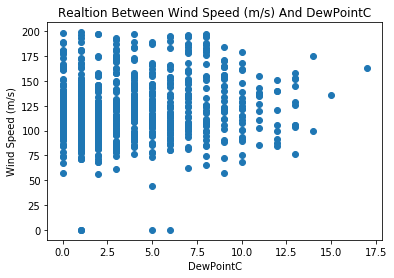

In [17]:
plt.scatter(dataset['Wind Speed (m/s)'],dataset['DewPointC'])
plt.xlabel('DewPointC')
plt.ylabel('Wind Speed (m/s)')
plt.title('Realtion Between Wind Speed (m/s) And DewPointC')
plt.show()

In [26]:
data_in=dataset.iloc[:,:-1]
data_in

,Wind Speed (m/s),DewPointC,Theoretical_Power_Curve,maxtempCWind Direction,LV ActivePower,windChillC,pressure,humidity
0,6,148,72,35,0,33.6,0.627,50
1,1,85,66,29,0,26.6,0.351,31
2,8,183,64,0,0,23.3,0.672,32
3,1,89,66,23,94,28.1,0.167,21
4,0,137,40,35,168,43.1,2.288,33
...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63
764,2,122,70,27,0,36.8,0.340,27
765,5,121,72,23,112,26.2,0.245,30
766,1,126,60,0,0,30.1,0.349,47


In [27]:
data_in=np.array(data_in)

In [28]:
data_in.shape

(768, 8)

In [29]:
data_out=dataset.iloc[:,-1]
data_out

0      1
1      0
2      1
3      0
4      1
      ..
763    0
764    0
765    0
766    1
767    0
Name: windGustKmph, Length: 768, dtype: int64

In [30]:
data_out.shape

(768,)

In [31]:
from sklearn.preprocessing import MinMaxScaler


In [33]:
sc=MinMaxScaler(feature_range=(0,1))


In [34]:
data_in=sc.fit_transform(data_in)


In [35]:
final_data=pd.concat([data_out,dataset],axis=1)

In [36]:
final_data.head()

,windGustKmph,Wind Speed (m/s),DewPointC,Theoretical_Power_Curve,maxtempCWind Direction,LV ActivePower,windChillC,pressure,humidity,windGustKmph
0,1,6,148,72,35,0,33.6,0.627,50,1
1,0,1,85,66,29,0,26.6,0.351,31,0
2,1,8,183,64,0,0,23.3,0.672,32,1
3,0,1,89,66,23,94,28.1,0.167,21,0
4,1,0,137,40,35,168,43.1,2.288,33,1


In [39]:
import boto3,re,os,json,sagemaker
from sagemaker import get_execution_role

In [40]:
role=get_execution_role()
print(role)


arn:aws:iam::748050252648:role/service-role/AmazonSageMaker-ExecutionRole-20201008T115394


In [43]:
my_region=boto3.session.Session().region_name
print(my_region)

us-east-1


In [44]:
containers = {'us-west-2': '433757028032.dkr.ecr.us-west-2.amazonaws.com/xgboost:latest',
              'us-east-1': '811284229777.dkr.ecr.us-east-1.amazonaws.com/xgboost:latest',
              'us-east-2': '825641698319.dkr.ecr.us-east-2.amazonaws.com/xgboost:latest',
              'eu-west-1': '685385470294.dkr.ecr.eu-west-1.amazonaws.com/xgboost:latest'}

In [45]:
print(containers[my_region])

811284229777.dkr.ecr.us-east-1.amazonaws.com/xgboost:latest


In [46]:
prefix='sagemaker/windsagemaker'
bucket_name='winddataset'

In [47]:
final_data.to_csv('train.csv',index=False,header=False)
boto3.Session().resource('s3').Bucket(bucket_name).Object(os.path.join(prefix,'train/train.csv')).upload_file('train.csv')
s3_input_train=sagemaker.s3_input(s3_data='s3://{}/{}/train'.format(bucket_name, prefix),content_type='csv')


's3_input' class will be renamed to 'TrainingInput' in SageMaker Python SDK v2.


In [48]:
sess=sagemaker.Session()
turbine_model=sagemaker.estimator.Estimator(containers[my_region],role,train_instance_count=1,train_instance_type='ml.m5.large',output_path='s3://{}/{}/output'.format(bucket_name,prefix),sagemaker_session=sess)
turbine_model.set_hyperparameters(max_depth=5,eta=0.2,gamma=4,min_child_weight=6,subsample=0.8,silent=0,objective='binary:logistic',num_round=100)


Parameter image_name will be renamed to image_uri in SageMaker Python SDK v2.


In [49]:
turbine_model.fit({'train':s3_input_train})

2020-10-08 15:20:12 Starting - Starting the training job...
2020-10-08 15:20:15 Starting - Launching requested ML instances......
2020-10-08 15:21:36 Starting - Preparing the instances for training......
2020-10-08 15:22:23 Downloading - Downloading input data...
2020-10-08 15:23:13 Training - Training image download completed. Training in progress.
2020-10-08 15:23:13 Uploading - Uploading generated training model.Arguments: train
[2020-10-08:15:23:08:INFO] Running standalone xgboost training.
[2020-10-08:15:23:08:INFO] Path /opt/ml/input/data/validation does not exist!
[2020-10-08:15:23:08:INFO] File size need to be processed in the node: 0.03mb. Available memory size in the node: 183.2mb
[2020-10-08:15:23:08:INFO] Determined delimiter of CSV input is ','
[15:23:08] S3DistributionType set as FullyReplicated
[15:23:08] 768x9 matrix with 6912 entries loaded from /opt/ml/input/data/train?format=csv&label_column=0&delimiter=,
[15:23:08] src/tree/updater_prune.cc:74: tree pruning end, 1 r

In [ ]:
detector=turbine_model.deploy(initial_instance_count=1,instance_type='ml.m5.large')

In [55]:
detector.endpoint

'xgboost-2020-10-08-15-20-12-194'

In [ ]:
#prediction

In [59]:
from sagemaker.predictor import csv_serializer

In [ ]:
test_data_array=test.drop('windGustKmph',axis=1).values #load the data into an array
detector.content_type = 'text/csv' # set the data type for an inference
detector.serializer = csv_serializer # set the serializer type
print(type(test_data_array))
print(test_data_array.shape)
predictions=detector.predict(test_data_array).decode('utf-8') # predict!
predictions_array = np.fromstring(predictions[1:], sep=',') # and turn the prediction into an array
print(predictions_array.shape)

In [ ]:
print(predictions)